In [1]:
import math
import os
import pandas as pd
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib as mpl
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures

In [2]:
fd = openpyxl.load_workbook("E:\\zsy\\小老师\\眼动仪2025.10.11\\data.xlsx")

In [ ]:
print(fd.sheetnames)

In [3]:
def get_samples(data, sample1, sample2, number=54):
    sheet_list = data.sheetnames
    
    result = np.zeros((number*2,1))
    for i in sheet_list:
        ws = np.array(list(data[i].values))
        ind1 = np.where(ws[0]==sample1)
        ind2 = np.where(ws[0]==sample2)
        
        temp = np.concatenate((ws[1:,ind1].squeeze(-1),ws[1:,ind2].squeeze(-1)),axis=0)
        result = np.concatenate((result, temp),axis=1)
    result = result.astype(float)
    label = np.array([sample1]*number+[sample2]*number).reshape(number*2,1)
    index = np.array([0]*number+[1]*number).reshape(number*2,1)
    result = np.concatenate((result, index),axis=1)
    result = np.concatenate((result, label),axis=1)
    print(result.shape)
    
    result = pd.DataFrame(result[:,1:])
    result.columns = sheet_list+['index']+['label']
    return result

In [174]:
data = get_samples(fd, 'C1', 'C2')

(108, 14)


In [210]:
print(data)

    TotFixationdur TotFixationdurincl0 AvgFixationdur Fixationcount  \
0         6.170622            6.170622       0.228542          27.0   
1         5.216918            5.216918       0.401301          13.0   
2         3.533518            3.533518       0.271809          13.0   
3         0.725035            0.725035       0.120839           6.0   
4           3.3835              3.3835       0.375944           9.0   
..             ...                 ...            ...           ...   
103       3.384989            3.384989       0.282082          12.0   
104       2.867395            2.867395        0.23895          12.0   
105       6.507351            6.507351       0.406709          16.0   
106       5.144279            5.144279       0.342952          15.0   
107        2.75014             2.75014       0.305571           9.0   

    Fixationcountincl0 TimetofirstFixation FirstFixationdur TotVisitdur  \
0                 27.0          103.959336         0.175011    7.279014 

In [13]:
temp = data.drop('index', axis=1)
temp = temp.drop('label',axis=1).astype(float)

print(temp.describe())
print(type(temp.describe()))
temp.describe().to_csv('/Users/dongxin/Desktop/眼动仪2025.10.11/total_static.csv')

<class 'pandas.core.frame.DataFrame'>


In [14]:
df = data.drop('label', axis=1)
df = df.astype(float)
model = ols('index ~ TotFixationdur+TotFixationdurincl0+AvgFixationdur+Fixationcount+Fixationcountincl0+TimetofirstFixation+FirstFixationdur+TotVisitdur+TotVisitdurincl0+AvgVisitdur+Visitcount', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)  # typ=1为类别间方差分析
print(anova_results)

                         sum_sq     df         F    PR(>F)
TotFixationdur         0.286168    1.0  1.145724  0.284850
TotFixationdurincl0    0.286168    1.0  1.145724  0.284850
AvgFixationdur         0.029098    1.0  0.116500  0.732974
Fixationcount          0.059743    1.0  0.239190  0.624960
Fixationcountincl0     0.059743    1.0  0.239190  0.624960
TimetofirstFixation    0.010485    1.0  0.041978  0.837727
FirstFixationdur       0.483754    1.0  1.936792  0.164502
TotVisitdur            0.194950    1.0  0.780517  0.377315
TotVisitdurincl0       0.194950    1.0  0.780517  0.377315
AvgVisitdur            1.312248    1.0  5.253811  0.022223
Visitcount             0.886777    1.0  3.550363  0.059986
Residual             159.603546  639.0       NaN       NaN


In [ ]:
plt.figure(dpi=300)

values = np.array(data.drop('TimetofirstFixation', axis=1))
t = values[:,-1]
values = values[:,:-2].T

df = pd.DataFrame(columns=['label','values','hue'])
for i in range(len(values)):
    temp=pd.DataFrame({
        'label':t,
        'values':values[i].astype(float),
        'hue' : list(data.columns)[i]
    })
    df = pd.concat([df,temp])

print(df)
sns.boxplot(data=df,y='values',x='label',hue='hue')

In [4]:
#vs = [('C1','D1'),('C2','D2'),('C3','D3'),('C4','D4'),('C5','D5'),('C6','D6')]
vs = [('E1','F1'),('E2','F2'),('E3','F3'),('E4','F4'),('E5','F5'),('E6','F6')]

data = pd.DataFrame(columns=['TotFixationdur', 'TotFixationdurincl0', 'AvgFixationdur', 'Fixationcount',\
                             'Fixationcountincl0', 'TimetofirstFixation', 'FirstFixationdur', 'TotVisitdur',\
                             'TotVisitdurincl0', 'AvgVisitdur', 'Visitcount','Visitcountincl0','index','label'])
for v in vs:
    print(v)
    temp = get_samples(fd, v[0], v[1])
    data = pd.concat([data,temp])

('E1', 'F1')
(108, 15)
('E2', 'F2')
(108, 15)
('E3', 'F3')
(108, 15)
('E4', 'F4')
(108, 15)
('E5', 'F5')
(108, 15)
('E6', 'F6')
(108, 15)


In [5]:
print(data)
#data.to_csv('/Users/dongxin/Desktop/眼动仪2025.10.11/data_T_EF.csv')

    TotFixationdur TotFixationdurincl0 AvgFixationdur Fixationcount  \
0         5.011871            5.011871       0.217907          23.0   
1         5.169326            5.169326        0.27207          19.0   
2         3.300176            3.300176       0.330018          10.0   
3         0.933389            0.933389       0.155565           6.0   
4         2.133447            2.133447       0.426689           5.0   
..             ...                 ...            ...           ...   
103       5.058603            5.058603       0.229936          22.0   
104       3.665173            3.665173       0.229073          16.0   
105       1.850089            1.850089       0.205565           9.0   
106       5.925283            5.925283       0.348546          17.0   
107       3.867035            3.867035        0.24169          16.0   

    Fixationcountincl0 TimetofirstFixation FirstFixationdur TotVisitdur  \
0                 23.0          204.081162         0.216679    6.145241 

In [6]:
temp = data.drop('index', axis=1)
temp = temp.drop('label', axis=1)
temp = temp.astype(float)
temp.describe()

,TotFixationdur,TotFixationdurincl0,AvgFixationdur,Fixationcount,Fixationcountincl0,TimetofirstFixation,FirstFixationdur,TotVisitdur,TotVisitdurincl0,AvgVisitdur,Visitcount,Visitcountincl0
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,4.078668,4.078668,0.348273,13.371914,13.371914,278.751457,0.299707,4.539185,4.539185,1.718517,3.365741,3.365741
std,1.595600,1.595600,0.281903,5.711694,5.711694,61.034969,0.315385,1.806436,1.806436,1.266310,1.628722,1.628722
min,0.183342,0.183342,0.104174,1.000000,1.000000,185.697095,0.059901,0.183342,0.183342,0.183342,1.000000,1.000000
25%,3.078450,3.078450,0.243947,9.000000,9.000000,232.843576,0.175007,3.372733,3.372733,0.854069,2.000000,2.000000
50%,4.075219,4.075219,0.285054,13.000000,13.000000,266.971290,0.233345,4.466894,4.466894,1.324515,3.000000,3.000000
75%,5.016218,5.016218,0.356354,17.000000,17.000000,314.570085,0.316688,5.635691,5.635691,2.209851,4.000000,4.000000
max,9.234214,9.234214,4.141878,30.000000,30.000000,508.976868,4.141878,9.348606,9.348606,9.300882,10.000000,10.000000


In [7]:
df = data.drop('label', axis=1)
df = df.astype(float)
model = ols('index ~ TotFixationdur+TotFixationdurincl0+AvgFixationdur+Fixationcount+Fixationcountincl0+TimetofirstFixation+FirstFixationdur+TotVisitdur+TotVisitdurincl0+AvgVisitdur+Visitcount+Visitcountincl0', data=df).fit()
anova_results = sm.stats.anova_lm(model)
print(anova_results)
#anova_results.to_csv('E:\\zsy\\小老师\\眼动仪2025.10.11\\result2_EF.csv')

                        df      sum_sq   mean_sq          F    PR(>F)
TotFixationdur         1.0    5.547918  5.547918  22.840386  0.000002
TotFixationdurincl0    1.0    0.186320  0.186320   0.767064  0.381456
AvgFixationdur         1.0    0.106575  0.106575   0.438763  0.507959
Fixationcount          1.0    0.310842  0.310842   1.279715  0.258376
Fixationcountincl0     1.0    0.360270  0.360270   1.483206  0.223723
TimetofirstFixation    1.0    0.002855  0.002855   0.011756  0.913694
FirstFixationdur       1.0    0.557700  0.557700   2.296012  0.130201
TotVisitdur            1.0    0.207109  0.207109   0.852654  0.356151
TotVisitdurincl0       1.0    0.346453  0.346453   1.426324  0.232808
AvgVisitdur            1.0    0.018240  0.018240   0.075093  0.784150
Visitcount             1.0    0.024902  0.024902   0.102522  0.748929
Visitcountincl0        1.0    0.002328  0.002328   0.009586  0.922035
Residual             639.0  155.212763  0.242899        NaN       NaN


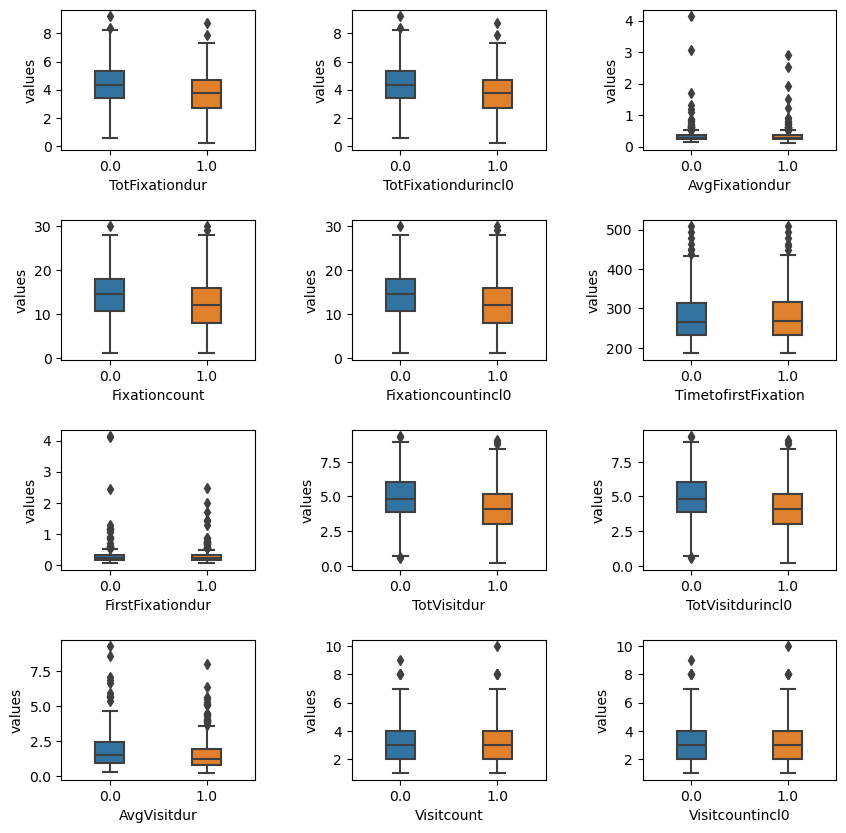

In [141]:
fig,axes=plt.subplots(4,3,figsize=(10,10))
location = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[3,0],[3,1],[3,2]]
for t in range(len(fd.sheetnames)):
    values = data[fd.sheetnames[t]]
    label = data['index']
    
    temp=pd.DataFrame({
        'label':label,
        'values':values.astype(float),
    })
    sns.boxplot(data=temp,y='values',x='label',width=0.3,ax=axes[location[t][0],location[t][1]]) 
    axes[location[t][0],location[t][1]].set_xlabel(fd.sheetnames[t])

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 调整水平和垂直间距
plt.savefig('E:\\zsy\\小老师\\眼动仪2025.10.11\\boxplot2.png', bbox_inches = 'tight')
plt.show()

In [159]:
temp = data.drop('label', axis=1)
# 创建 logistic 回归模型
logit_model = sm.OLS(temp['index'].astype(float), temp.drop('index', axis=1).astype(float), family=sm.families.Binomial())
# 拟合模型
result = logit_model.fit()
# 打印模型摘要
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  index   R-squared (uncentered):                   0.489
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              76.61
Date:                Thu, 16 Oct 2025   Prob (F-statistic):                    2.89e-88
Time:                        15:20:18   Log-Likelihood:                         -477.24
No. Observations:                 648   AIC:                                      970.5
Df Residuals:                     640   BIC:                                      1006.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\dx\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [40]:
model = RandomForestClassifier(n_estimators=1000,max_depth=5)

y = data['index'].astype(float)
x = data.drop('label',axis=1).astype(float)
x = x.drop('index',axis=1).astype(float)
#x = np.array(data[['TimetofirstFixation', 'FirstFixationdur','TotFixationdur','Fixationcount']].astype(float))

model.fit(x,y)
result = model.score(x,y)
print(result)

0.8040123456790124


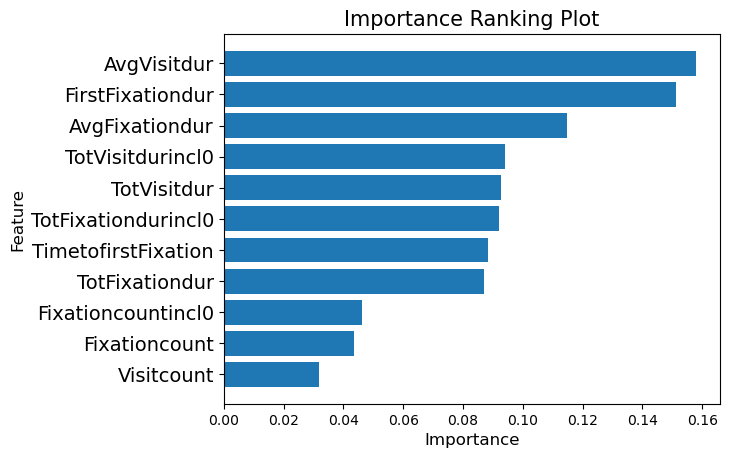

In [41]:
sorted_index = model.feature_importances_.argsort()
title = np.array(fd.sheetnames)

plt.barh(range(x.shape[1]), model.feature_importances_[sorted_index])
plt.yticks(np.arange(x.shape[1]),title[sorted_index],fontsize=14)
plt.xlabel('Importance',fontsize=12)
plt.ylabel('Feature',fontsize=12)
plt.title('Importance Ranking Plot',fontsize=15)

plt.savefig('E:\\zsy\\小老师\\眼动仪2025.10.11\\importance1_4.png', bbox_inches = 'tight')
plt.show()

In [82]:
# 获取R^2分数
r2 = model.score(x, y)
print(f'R^2 Score: {r2}')

# 获取均方误差（MSE）
mse = mean_squared_error(y, model.predict(x))
print(f'Mean Squared Error: {mse}')

R^2 Score: 1.0
Mean Squared Error: 0.0


In [ ]:
x = data[['TimetofirstFixation', 'FirstFixationdur','TotFixationdur','Fixationcount','index']].astype(float)
x = x.drop('index', axis=1)
# 创建 logistic 回归模型

logit_model = sm.GLM(data['index'].astype(float), x, family=sm.families.Binomial())
# 拟合模型
result = logit_model.fit()
# 打印模型摘要
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:                  index   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              147.8
Date:                Thu, 16 Oct 2025   Prob (F-statistic):                    1.24e-89
Time:                        15:18:17   Log-Likelihood:                         -483.83
No. Observations:                 648   AIC:                                      975.7
Df Residuals:                     644   BIC:                                      993.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\dx\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


In [43]:
from sklearn.preprocessing import PolynomialFeatures

   TotFixationdur TotFixationdurincl0 AvgFixationdur Fixationcount  \
0        5.011871            5.011871       0.217907          23.0   
1        5.169326            5.169326        0.27207          19.0   
2        3.300176            3.300176       0.330018          10.0   
3        0.933389            0.933389       0.155565           6.0   
4        2.133447            2.133447       0.426689           5.0   
..            ...                 ...            ...           ...   
49       3.390955            3.390955       0.242211          14.0   
50       4.400219            4.400219       0.293348          15.0   
51       6.821782            6.821782       0.401281          17.0   
52       2.866812            2.866812       0.409545           7.0   
53        3.29182             3.29182       0.253217          13.0   

   Fixationcountincl0 TimetofirstFixation FirstFixationdur TotVisitdur  \
0                23.0          204.081162         0.216679    6.145241   
1          

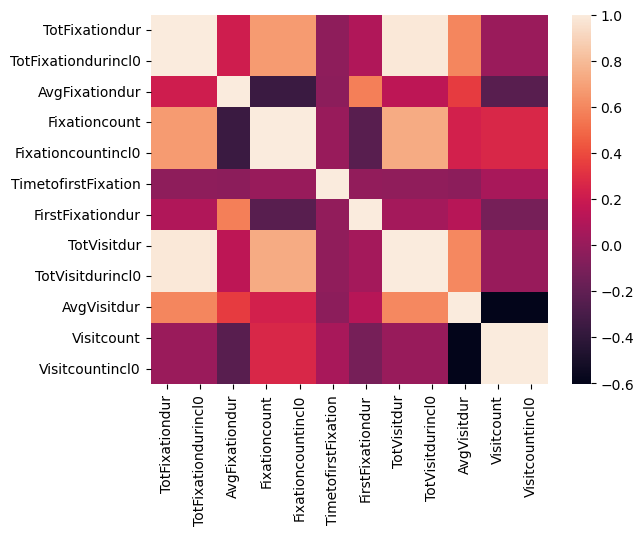

In [ ]:
x = data[data['index'] == '0.0']
print(x)
x = data.drop('label',axis=1).astype(float)
x = x.drop('index',axis=1).astype(float)
#x = data[['TimetofirstFixation', 'FirstFixationdur','TotFixationdur','Fixationcount','index']].astype(float)

cor = x.astype(float).corr()
sns.heatmap(cor)
plt.savefig('E:\\zsy\\小老师\\眼动仪2025.10.11\\heatmap2.png', bbox_inches = 'tight')
print(cor)
#cor.to_csv('E:\\zsy\\小老师\\眼动仪2025.10.11\\corration1.csv')

In [99]:
print(x)

     TimetofirstFixation  FirstFixationdur  TotFixationdur  Fixationcount  \
0             103.959336          0.175011        6.170622           27.0   
1             102.965841          0.200012        5.216918           13.0   
2              93.686930          0.183346        3.533518           13.0   
3             108.706031          0.100007        0.725035            6.0   
4             223.272946          0.200013        3.383500            9.0   
..                   ...               ...             ...            ...   
103           243.042527          0.883377        3.384989           12.0   
104           102.359551          0.191672        2.867395           12.0   
105           119.136118          0.341677        6.507351           16.0   
106           153.351842          0.275013        5.144279           15.0   
107           144.528431          0.341686        2.750140            9.0   

     index  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [25]:
from scipy.stats import chi2_contingency
from scipy import stats

In [163]:
#vs = [('C1','D1'),('C2','D2'),('C3','D3'),('C4','D4'),('C5','D5'),('C6','D6')]
vs = [('E1','F1'),('E2','F2'),('E3','F3'),('E4','F4'),('E5','F5'),('E6','F6')]

data = pd.DataFrame(columns=['TotFixationdur', 'TotFixationdurincl0', 'AvgFixationdur', 'Fixationcount',\
                             'Fixationcountincl0', 'TimetofirstFixation', 'FirstFixationdur', 'TotVisitdur',\
                             'TotVisitdurincl0', 'AvgVisitdur', 'Visitcount','Visitcountincl0','index','label'])
for v in vs:
    print(v)
    temp = get_samples(fd, v[0], v[1])
    data = pd.concat([data,temp])

('E1', 'F1')
(108, 15)
('E2', 'F2')
(108, 15)
('E3', 'F3')
(108, 15)
('E4', 'F4')
(108, 15)
('E5', 'F5')
(108, 15)
('E6', 'F6')
(108, 15)


In [164]:
print(data)

    TotFixationdur TotFixationdurincl0 AvgFixationdur Fixationcount  \
0         5.011871            5.011871       0.217907          23.0   
1         5.169326            5.169326        0.27207          19.0   
2         3.300176            3.300176       0.330018          10.0   
3         0.933389            0.933389       0.155565           6.0   
4         2.133447            2.133447       0.426689           5.0   
..             ...                 ...            ...           ...   
103       5.058603            5.058603       0.229936          22.0   
104       3.665173            3.665173       0.229073          16.0   
105       1.850089            1.850089       0.205565           9.0   
106       5.925283            5.925283       0.348546          17.0   
107       3.867035            3.867035        0.24169          16.0   

    Fixationcountincl0 TimetofirstFixation FirstFixationdur TotVisitdur  \
0                 23.0          204.081162         0.216679    6.145241 

In [144]:
result = []
for title in fd.sheetnames:
    print(title)
    
    temp = np.array(data[[title,'index']]).astype(float)
    a1 = []
    a2 = []
    
    for i in temp:
        if i[1] == 1:
            a2.append(i[0])
        else:
            a1.append(i[0])
    #chi2, p_value, _, expected = chi2_contingency([a1,a2])
    t_statistic, p_value = stats.ttest_ind(a1, a2)
    print("t_statistic:", t_stat)
    print("P-value:", p_value)
    #chi2, p2, _, expected = chi2_contingency([a1,a2])
    #print("chi2:", chi2)
    #print("P-value:", p2)
    result.append([title, t_statistic, p_value])
pd.DataFrame(result,columns=['title','Chi2 Statistic','P-value']).to_csv('E:\\zsy\\小老师\\眼动仪2025.10.11\\ttest2.csv')

TotFixationdur
t_statistic: 2.205533467991435
P-value: 2.1085494318169134e-06
TotFixationdurincl0
t_statistic: 2.205533467991435
P-value: 2.1085494318169134e-06
AvgFixationdur
t_statistic: 2.205533467991435
P-value: 0.718110956879277
Fixationcount
t_statistic: 2.205533467991435
P-value: 3.653418988792634e-05
Fixationcountincl0
t_statistic: 2.205533467991435
P-value: 3.653418988792634e-05
TimetofirstFixation
t_statistic: 2.205533467991435
P-value: 0.9975958227126047
FirstFixationdur
t_statistic: 2.205533467991435
P-value: 0.20958340405312226
TotVisitdur
t_statistic: 2.205533467991435
P-value: 8.100261823288748e-07
TotVisitdurincl0
t_statistic: 2.205533467991435
P-value: 8.100261823288748e-07
AvgVisitdur
t_statistic: 2.205533467991435
P-value: 0.0038299298941230366
Visitcount
t_statistic: 2.205533467991435
P-value: 0.8283436826148096
Visitcountincl0
t_statistic: 2.205533467991435
P-value: 0.8283436826148096


In [ ]:
print()

性别

In [2]:
def get_sex(fd,sample1,sample2,data):
    sheet_list = fd.sheetnames

    for i in sheet_list:
        ws = np.array(list(fd[i].values))
        ind1 = np.where(ws[0]==sample1)
        ind2 = np.where(ws[0]==sample2)
        print(ind1)
        sex1 = np.where(ws[:,4]=='男性')
        sex2 = np.where(ws[:,4]=='女性')
        
        c_m = ws[sex1,ind1][0]
        c_f = ws[sex2,ind1][0]
        d_m = ws[sex1,ind2][0]
        d_f = ws[sex2,ind2][0]
        
        temp = pd.DataFrame({'C_M':c_m,'C_F':c_f,'D_M':d_m,'D_F':d_f})
        
        data = pd.concat([data,temp])
    return data

In [165]:
def get_sex(fd, title, sample):
    ws = np.array(list(fd[title].values))
    ind = []
    for i in range(len(ws[0])):
        if sample in ws[0][i] and len(ws[0][i])<3:
            ind.append(i)
    
    sex1 = np.where(ws[:,4]=='男性')
    sex2 = np.where(ws[:,4]=='女性')
    
    temp = ws[:,ind]
    male = temp[sex1].flatten()
    female = temp[sex2].flatten()
    return male.astype(float), female.astype(float)

In [6]:
male, female = get_sex(fd, 'TotFixationdur', 'C')
print(male)
print(female)

[6.170622 4.783725 1.7751   2.385255 5.323631 3.641875 3.3835   3.916863
 2.775145 5.904252 4.316884 5.647432 5.125263 4.468317 2.873154 5.828341
 2.883469 4.433238 3.975211 3.722982 3.016819 4.7919   2.641797 5.754544
 4.750264 2.091778 4.0502   4.841921 1.840761 2.582409 5.777332 4.073934
 3.941857 2.908476 5.77529  3.258507 6.508665 5.450283 6.373846 7.728839
 5.425272 0.808378 5.300237 1.066723 2.075114 4.153951 3.458944 4.363919
 6.017382 7.008701 7.54735  4.41051  6.577253 0.458361 4.877546 2.058433
 3.7335   2.850128 4.266892 2.633467 5.202756 1.641743 5.741967 3.445881
 4.334355 5.533612 3.266817 2.550117 2.969025 3.566838 3.375164 4.492259
 4.716917 3.75021  2.902578 3.266847 6.115896 3.475169 1.433407 1.34173
 4.506894 5.70205  3.098517 3.711877 3.784526 3.214675 6.619843 4.536183
 4.999381 1.175068 4.608182 4.441883 4.01687  4.183552 2.791814 3.833529
 7.043997 5.041901 4.300216 4.916911 4.958714 3.780356 7.025337 5.173813
 3.366845 4.633689 4.825248 1.646821 4.133526 4.1563

In [10]:
t_stat, p_value = stats.ttest_ind(male,female)
print("t_statistic:", t_stat)
print("P-value:", p_value)

t_statistic: 0.6047308391030546
P-value: 0.5457837453835214


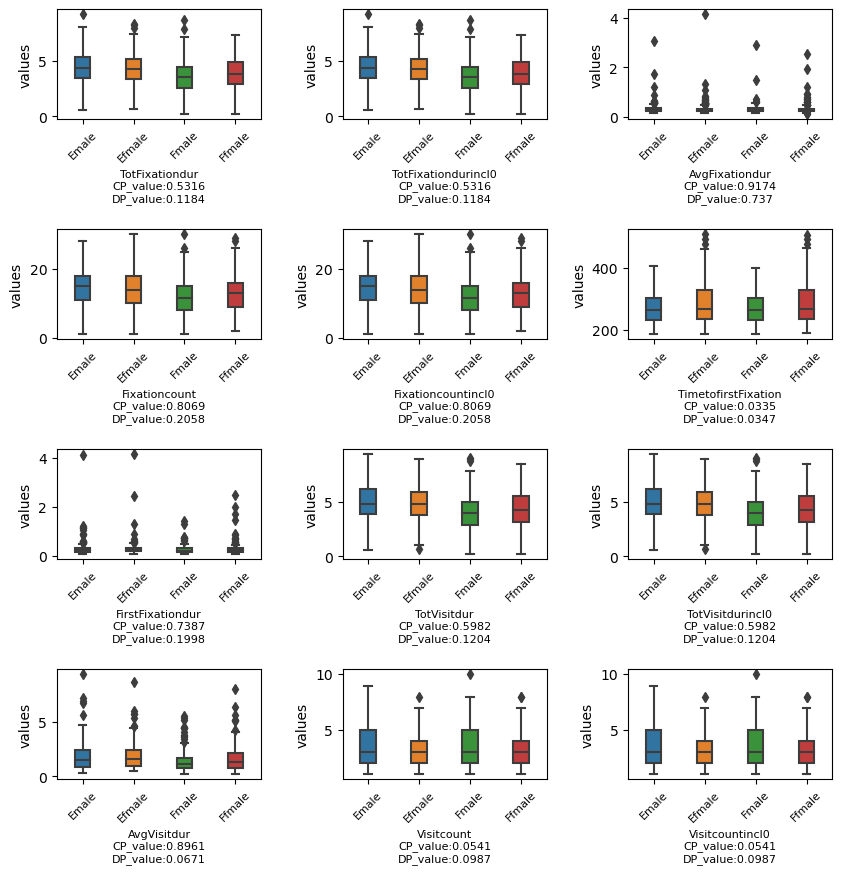

In [167]:
fig,axes=plt.subplots(4,3,figsize=(10,10))
location = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[3,0],[3,1],[3,2]]
for t in range(len(fd.sheetnames)):
    cmale, cfemale = get_sex(fd, fd.sheetnames[t], 'E')
    ct_stat, cp_value = stats.ttest_ind(cmale,cfemale)
    dmale, dfemale = get_sex(fd, fd.sheetnames[t], 'F')
    dt_stat, dp_value = stats.ttest_ind(dmale,dfemale)
    
    temp=pd.DataFrame({
        'label':['Emale']*len(cmale)+['Efeamale']*len(cfemale)+['Fmale']*len(dmale)+['Ffeamale']*len(dfemale),
        'values':np.concatenate((cmale,cfemale,dmale,dfemale),axis=0)
    })
    
    sns.boxplot(data=temp,y='values',x='label',width=0.3,ax=axes[location[t][0],location[t][1]]) 
    axes[location[t][0],location[t][1]].set_xlabel(fd.sheetnames[t]+'\nCP_value:'+str(round(cp_value,4))+'\nDP_value:'+str(round(dp_value,4)), fontsize=8)
    axes[location[t][0],location[t][1]].set_xticklabels(['Emale','Efmale','Fmale','Ffmale'],size=8, rotation=45)
    
    
plt.subplots_adjust(hspace=1, wspace=0.4)  # 调整水平和垂直间距
plt.savefig('E:\\zsy\\小老师\\眼动仪2025.10.11\\boxplot2_sex.png', bbox_inches = 'tight')
plt.show()

时间，视觉疲劳

In [168]:
def get_time(fd, title, sample):
    ws = np.array(list(fd[title].values))
    ind = []
    
    index = np.where(ws[0]==sample)
    data = ws[1:,index]

    return data.flatten().astype(float)

In [91]:
get_time(fd, 'TotFixationdur', 'C1')

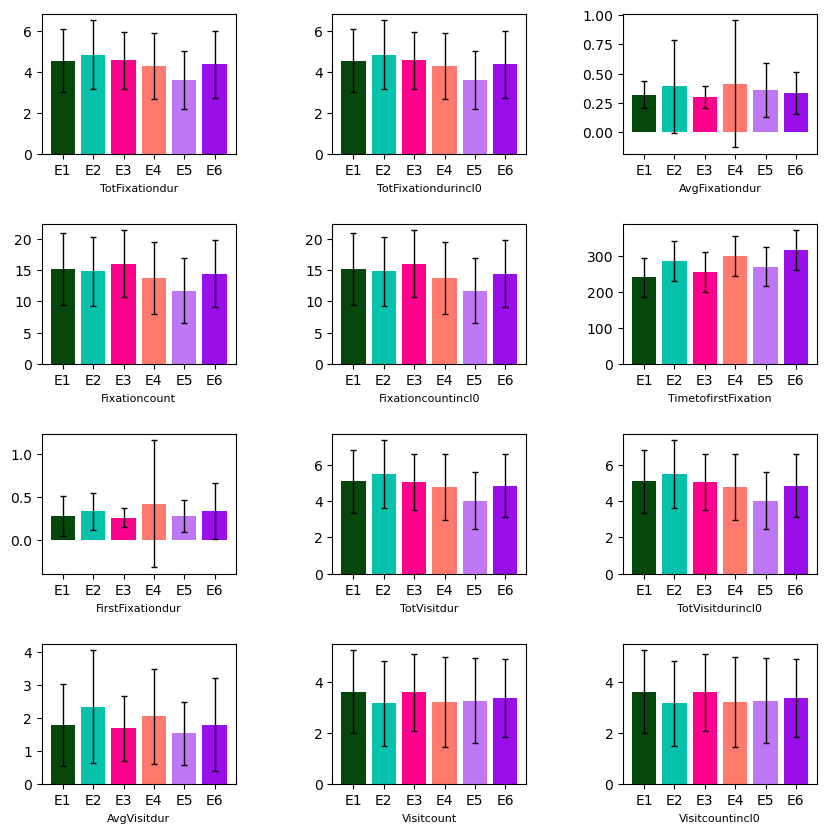

In [170]:
fig,axes=plt.subplots(4,3,figsize=(10,10))
location = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[3,0],[3,1],[3,2]]
color = ['#06470c','#06c2ac','#ff028d','#ff796c','#bf77f6','#9a0eea']
title = ['E1','E2','E3','E4','E5','E6']

for t in range(len(fd.sheetnames)):
    result = []
    err = []
    for x in title:
        temp = get_time(fd, fd.sheetnames[t], x)
        result.append(np.average(temp))
        err.append(temp)

    err = np.std(err,axis=1)
    axes[location[t][0],location[t][1]].bar(title, result,color=color)
    axes[location[t][0],location[t][1]].errorbar(title, result, yerr=err, capsize=2, elinewidth=1, ecolor='black',ls='none')
    axes[location[t][0],location[t][1]].set_xlabel(fd.sheetnames[t], fontsize=8)


plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 调整水平和垂直间距
plt.savefig('E:\\zsy\\小老师\\眼动仪2025.10.11\\bar2.png', bbox_inches = 'tight')
plt.show()